In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing #scale
import matplotlib.pyplot as plt

# Data Generation Code

Generate data of 100 variables, 10 rows
my data matrix is ​​10x100
with 2 different characteristics as index: "wt" and "ko".

wt: Wild Type DNA

ko: Knock Out DNA

Mg: Mutated DNA

ofa: DNA Orbit

In [2]:
genes = ['gene' + str(i) for i in range(1,101)]
genes[:3]

['gene1', 'gene2', 'gene3']

wt= wild type samples

ko= knock out samples

mg = mutated samples

ofa = orbit sample


<b>wt dan ko dibangkitkan dari populasi yang berbeda</b>

In [3]:
wt = ['wt' + str(i) for i in range(1,7)]
ko = ['ko' + str(i) for i in range(1,7)]
mg = ['mg' + str(i) for i in range(1,7)]
ofa = ['ofa' + str(i) for i in range(1,7)]

wt[:5]

['wt1', 'wt2', 'wt3', 'wt4', 'wt5']

In [4]:
data = pd.DataFrame(columns=[*wt, *ko, *mg, *ofa], index=genes)
data.head()

,wt1,wt2,wt3,wt4,wt5,wt6,ko1,ko2,ko3,ko4,...,mg3,mg4,mg5,mg6,ofa1,ofa2,ofa3,ofa4,ofa5,ofa6
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# random azaa
for gene in data.index:
    data.loc[gene,'wt1':'wt6'] = np.random.poisson(lam=rd.randrange(10,200), size=6)
    data.loc[gene,'ko1':'ko6'] = np.random.poisson(lam=rd.randrange(15,300), size=6)
    data.loc[gene,'mg1':'mg6'] = np.random.poisson(lam=rd.randrange(10,400), size=6)
    data.loc[gene,'ofa1':'ofa6'] = np.random.poisson(lam=rd.randrange(50,1000), size=6)

In [6]:
data.head()

,wt1,wt2,wt3,wt4,wt5,wt6,ko1,ko2,ko3,ko4,...,mg3,mg4,mg5,mg6,ofa1,ofa2,ofa3,ofa4,ofa5,ofa6
gene1,138,142,133,109,152,151,310,278,288,315,...,295,308,318,351,592,526,567,561,521,551
gene2,60,56,60,57,72,71,165,166,183,160,...,195,203,218,226,406,431,431,397,427,415
gene3,21,20,17,24,20,18,63,61,58,72,...,316,334,330,346,777,771,791,768,806,824
gene4,29,33,27,35,31,21,202,204,267,246,...,255,270,274,258,778,781,762,776,772,782
gene5,192,183,176,200,174,191,105,103,121,109,...,173,198,166,211,934,965,949,960,907,932


<b>X is the variable gene1 to gene100</b>

<b>Ko, wt, mg, ofa --> index</b>

In [7]:
print("baris kali kolom : ", data.shape)
#baris di kali kolom, ukuran matriks data kita

baris kali kolom :  (100, 24)


In [8]:
data=data.T
data

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene91,gene92,gene93,gene94,gene95,gene96,gene97,gene98,gene99,gene100
wt1,138,60,21,29,192,22,140,66,123,79,...,132,113,19,73,59,114,10,29,169,35
wt2,142,56,20,33,183,23,165,71,114,83,...,145,133,27,59,45,108,11,31,177,38
wt3,133,60,17,27,176,27,155,69,127,84,...,133,119,18,81,40,114,14,36,150,32
wt4,109,57,24,35,200,36,154,84,135,78,...,143,107,17,61,53,99,8,37,177,40
wt5,152,72,20,31,174,25,178,84,140,85,...,128,115,20,69,53,117,7,37,181,30
wt6,151,71,18,21,191,23,155,82,109,91,...,130,103,21,64,59,118,4,39,147,40
ko1,310,165,63,202,105,285,229,240,31,16,...,259,196,99,34,227,135,135,48,178,238
ko2,278,166,61,204,103,275,279,245,24,8,...,261,180,80,34,263,131,120,58,214,204
ko3,288,183,58,267,121,283,258,247,31,15,...,258,179,91,34,245,124,140,56,207,202
ko4,315,160,72,246,109,296,235,275,30,17,...,260,185,88,28,241,121,115,71,224,199


The data owned is data with 100 features (genes) shown by **COLUMNS**. And 10 data observations **ROWS**

# Perform PCA on the data

scale = $\frac{(measure-mean)^2}{n.measurements}$

In [9]:
# First center and scale the data
scaled_data = preprocessing.scale(data)

In [10]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

# Draw a scree plot and a PCA plot

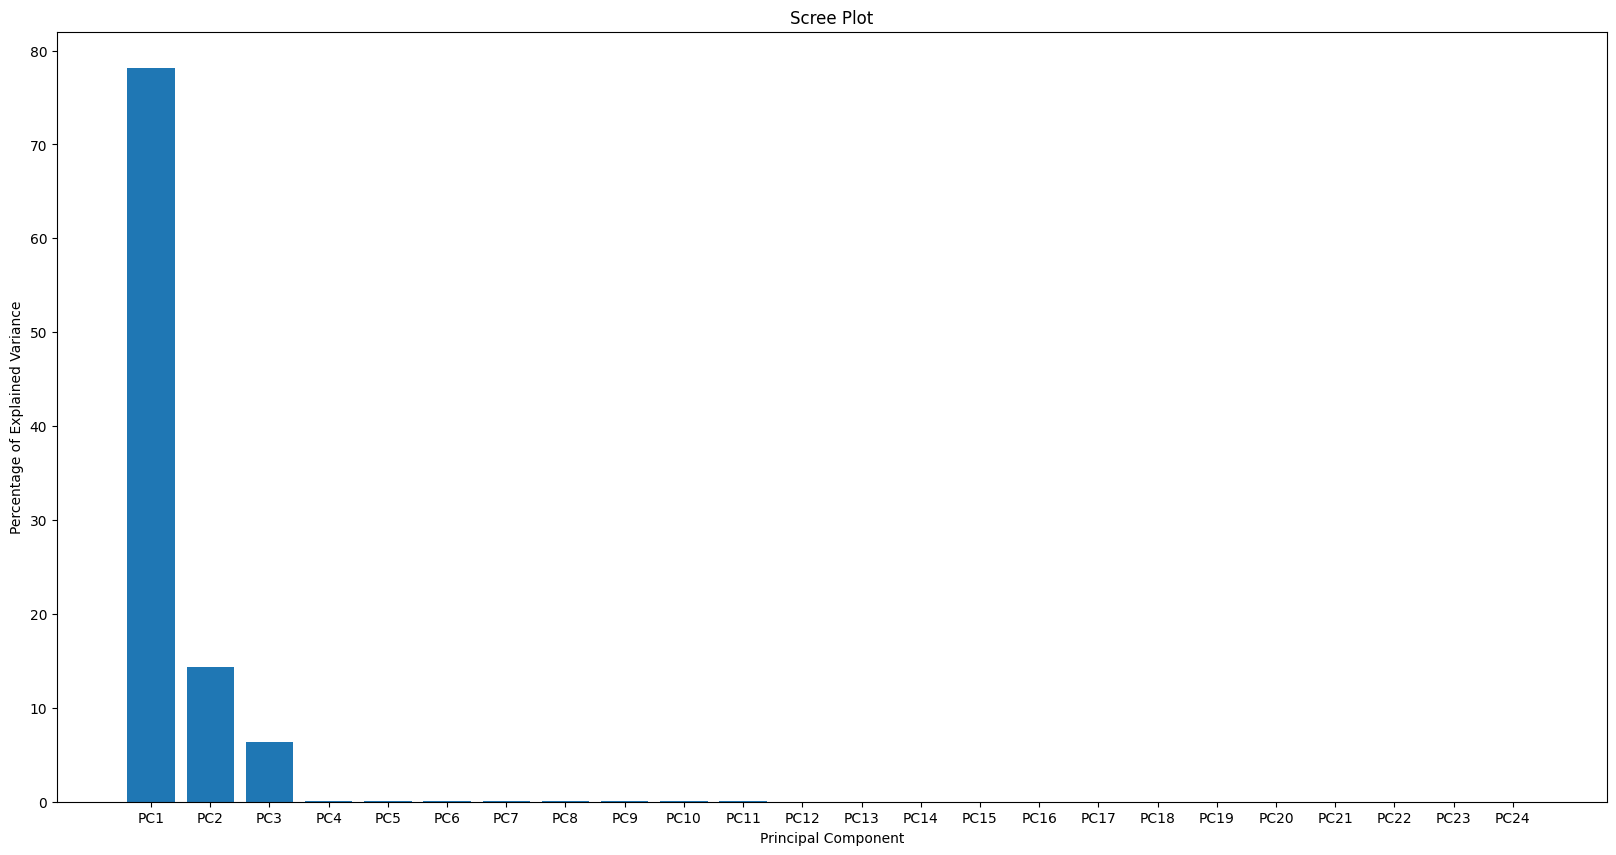

In [14]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,10))  # Adjust the width and height here
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [15]:
np.round(pca.explained_variance_ratio_* 100, decimals=1)

array([78.1, 14.4,  6.4,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ])

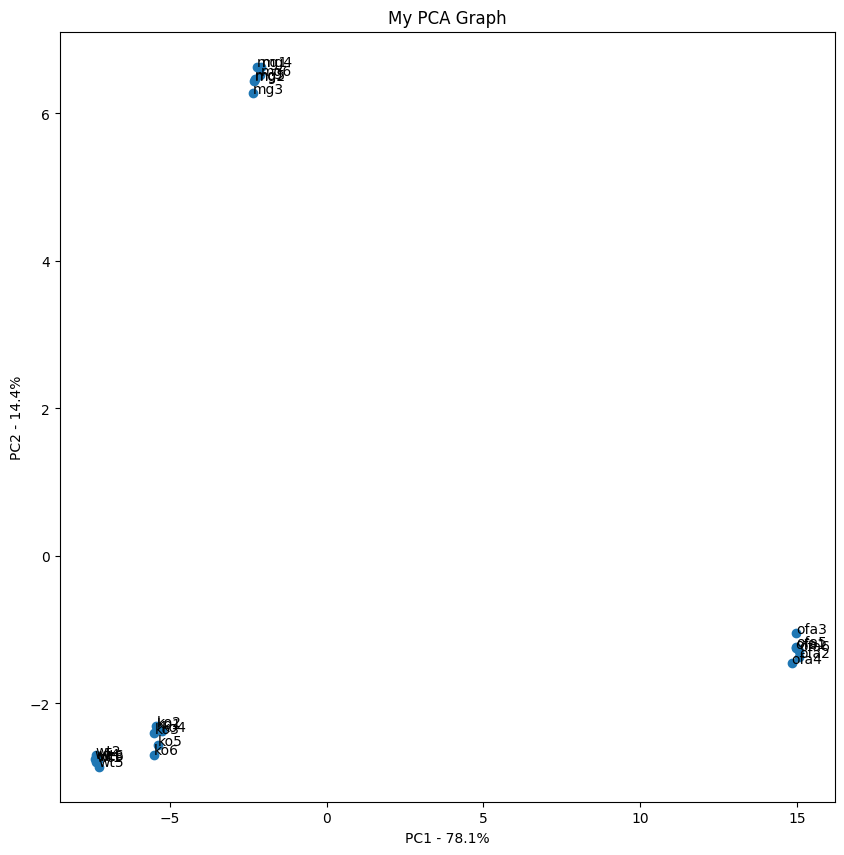

In [18]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko, *mg, *ofa], columns=labels)
plt.figure(figsize=(10,10))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

**Insight**


* In general, the data consists of 2 clusters, namely ko and wt
* The further the distance of the observation point, the further the characteristics
* The value of the information captured by the visualization above PC 1 is 92.5%





# Determine which genes had the biggest influence on PC1

In [19]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
loading_scores

,0
gene1,0.106422
gene2,0.109320
gene3,0.110836
gene4,0.110843
gene5,0.110428
...,...
gene96,0.111003
gene97,0.112523
gene98,0.112067
gene99,0.112401


Loading score shows the correlation value of features to PC, the bigger the loading score, the bigger the contribution to PC.

In [20]:
## now sort the loading scores based on their magnitude (besar ke kecil)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

,0
gene34,0.112911
gene40,0.112839
gene33,0.112666
gene97,0.112523
gene99,0.112401
...,...
gene79,0.019203
gene66,0.017110
gene24,0.009326
gene85,0.008444


In [21]:
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values

In [24]:
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene34    0.112911
gene40    0.112839
gene33    0.112666
gene97    0.112523
gene99    0.112401
gene16    0.112383
gene21    0.112309
gene68    0.112268
gene98    0.112067
gene57    0.112050
dtype: float64
